1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

From the diagram we choose (0.5, 0,70) and (-0.5, -0,70) for initial guesses.

FIRST global minima: [-0.08984165  0.7126562 ]
function value: -1.0316284534890983 

SECOND global minima: [ 0.08984164 -0.71265621]
function value: -1.0316284534891063 

solution for initial guess=[0,0] and default method: [0. 0.]
function value: 0.0
Its wrong.Changing the default method to Nelder-Mead.

Solution for initial guess=[0,0] with 'Nelder-Mead': [-0.08985145  0.71266538]
Function value: -1.031628452567338 



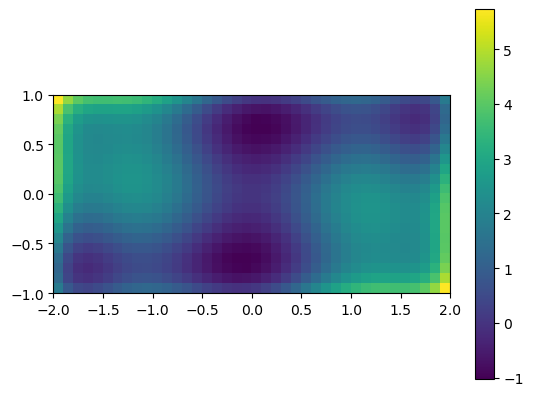

In [2]:
def f(x):
    return (4 - 2.1*x[0]**2 + x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

x = np.linspace(-2, 2, 40)
y = np.linspace(-1, 1, 20)
x1, y1 = np.meshgrid(x, y)
plt.figure()
plt.imshow(f([x1, y1]), extent=[-2, 2, -1, 1])
plt.colorbar()
#****
print("From the diagram we choose (0.5, 0,70) and (-0.5, -0,70) for initial guesses.\n")
solution = optimize.minimize(f, [0.5, 0.70])
print("FIRST global minima:" ,solution['x'])
print("function value:", f(solution['x']),"\n")
solution = optimize.minimize(f, [-0.5, -0.70])
print("SECOND global minima:" ,solution['x'])
print("function value:", f(solution['x']),"\n")
solution = optimize.minimize(f, [0, 0])
print("solution for initial guess=[0,0] and default method:" ,solution['x'])
print("function value:", f(solution['x']))
print("Its wrong.Changing the default method to Nelder-Mead.\n")
solution = optimize.minimize(f, [0, 0], method='Nelder-Mead')
print("Solution for initial guess=[0,0] with 'Nelder-Mead':" ,solution['x'])
print("Function value:", f(solution['x']),"\n")

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

Chaotic motion depends on amplitude of motion and frequency of implied force.
If the frequency of force is near the natural frequency and the amplitude is
big enough that sin(theta) != theta, then chaos can happen. The last diagram is an example.



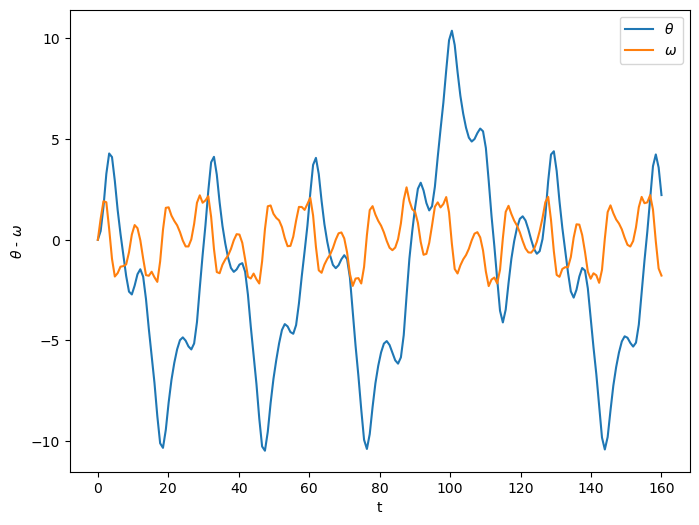

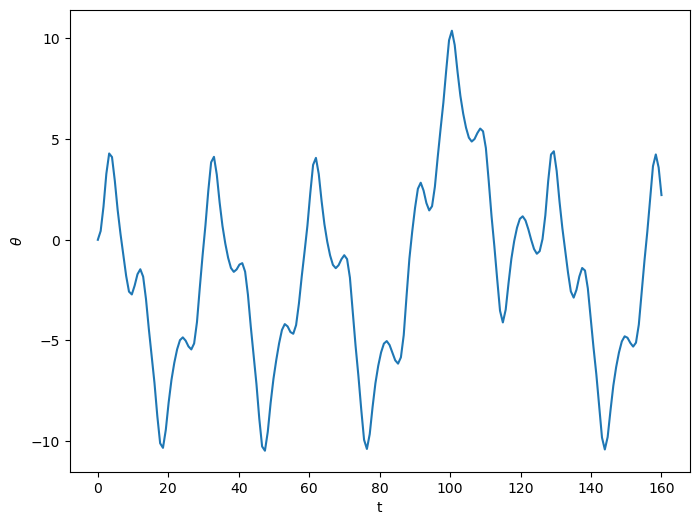

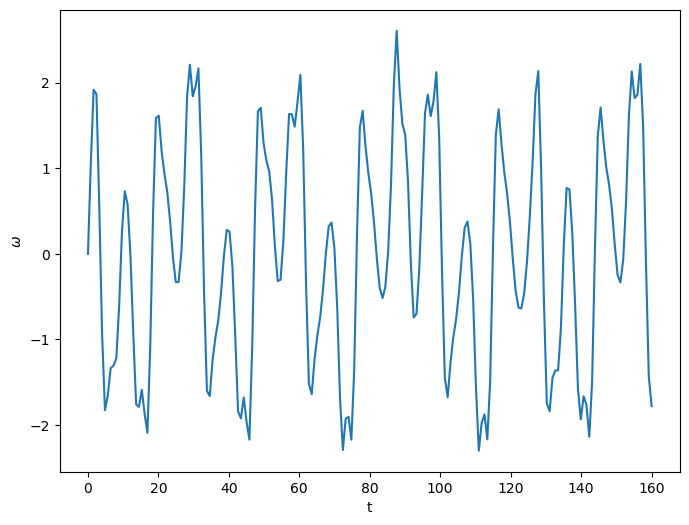

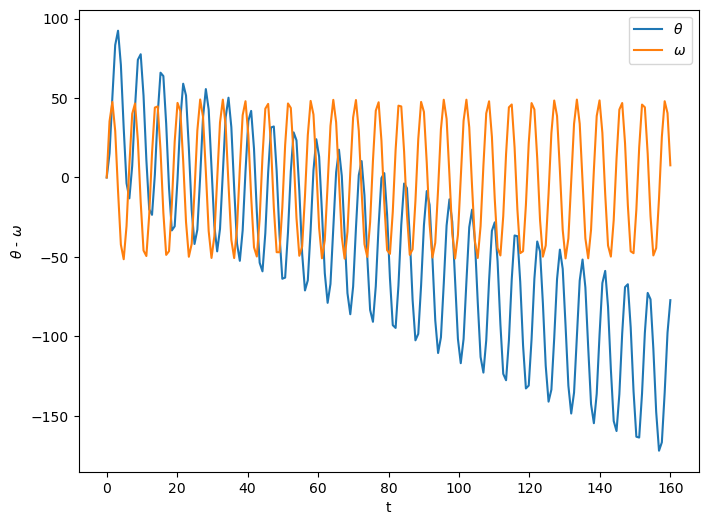

In [5]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

def damped_pendulum(v, time, q, d, omega):
    """
    Defines the coupled first-order ODEs for the damped pendulum.
    v[0] represents theta, and v[1] represents omega.
    """
    return [v[1], -1/q * v[1] + np.sin(v[0]) + d * np.cos(omega * time)] 
#parameteres
q = 2
d = 1.5
omega = 0.65

#time
t = np.linspace(0, 160, 200)

#initial conditions
v_init = (0, 0)

solution = odeint(damped_pendulum, v_init, t, args=(q, d, omega))

plt.figure(figsize=(8, 6))
plt.plot(t, solution[:, 0], label="$\\theta$")
plt.plot(t, solution[:, 1], label="$\\omega$")
plt.xlabel('t')
plt.ylabel('$\\theta$ - $\\omega$')
plt.legend(loc='best')

plt.figure(figsize=(8, 6))
plt.plot(t, solution[:, 0])
plt.xlabel('t')
plt.ylabel('$\\theta$')

plt.figure(figsize=(8, 6))
plt.plot(t, solution[:, 1])
plt.xlabel('t')
plt.ylabel('$\\omega$')

# Chaotic motion example
print("Chaotic motion depends on amplitude of motion and frequency of implied force.")
print("If the frequency of force is near the natural frequency and the amplitude is")
print("big enough that sin(theta) != theta, then chaos can happen. The last diagram is an example.\n")

# Parameters for chaotic motion
q_chaotic = 20
d_chaotic = 50
omega_chaotic = 1

#solving the ODE for chaotic motion
solution_chaotic = odeint(damped_pendulum, v_init, t, args=(q_chaotic, d_chaotic, omega_chaotic))

#chaotic motion
plt.figure(figsize=(8, 6))
plt.plot(t, solution_chaotic[:, 0], label="$\\theta$")
plt.plot(t, solution_chaotic[:, 1], label="$\\omega$")
plt.xlabel('t')
plt.ylabel('$\\theta$ - $\\omega$')
plt.legend(loc='best')

plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

Hares : 
Peak frequency: 0.09523809523809523
Periodicity (1/freq): 10.5 years.

Lynxes : 
Peak frequency: 0.09523809523809523
Periodicity (1/freq): 10.5 years.

These periods can be seen in the population diagram (e.g., '1913 - 1902 ~= 10.5' for hares).



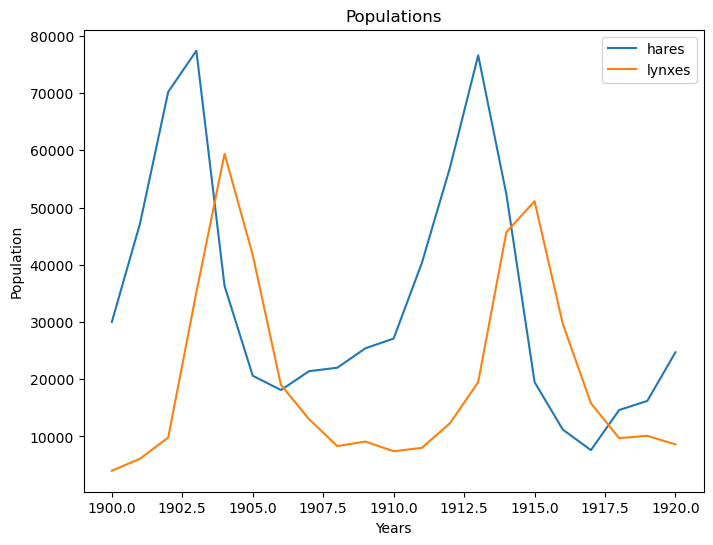

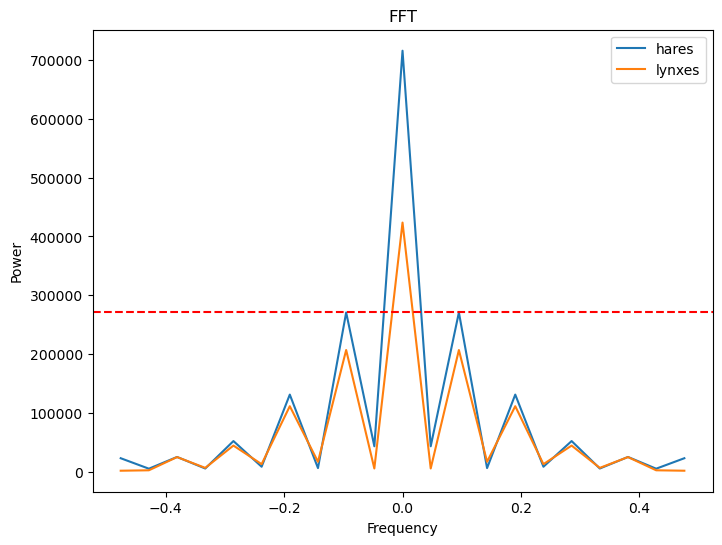

In [17]:
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
def calculate_periodicity(population, species_name):
    fft_population = fftpack.fft(population)
    power_population = np.abs(fft_population)
    sample_freq = fftpack.fftfreq(fft_population.size)

    pos_mask = np.where(sample_freq > 0)
    freqs_population = sample_freq[pos_mask]
    powers_population = power_population[pos_mask]
    peak_freq = freqs_population[powers_population.argmax()]

    print(f"{species_name} : ")
    print("Peak frequency:", peak_freq)
    print("Periodicity (1/freq):", 1/peak_freq, "years.\n")

data = np.loadtxt('populations.txt')
year, hare, lynx, carrot = data.T
calculate_periodicity(hare, "Hares")
calculate_periodicity(lynx, "Lynxes")

print("These periods can be seen in the population diagram (e.g., '1913 - 1902 ~= 10.5' for hares).\n")

sample_freq = fftpack.fftfreq(len(lynx))
i = np.argsort(sample_freq)

plt.figure(figsize=(8, 6))
plt.plot(year, hare, label='hares')
plt.plot(year, lynx, label='lynxes')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Populations')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(sample_freq[i], power_hares[i], label='hares')
plt.plot(sample_freq[i], power_lynxes[i], label='lynxes')
plt.axhline(powes_hares[powes_hares.argmax()], color='r', ls='--')  # Corrected line
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(('Hares', 'Lynxes'), loc='best')
plt.title("FFT")
plt.legend()
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [ ]:
from matplotlib.colors import LogNorm

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

img = plt.imread("images/moonlanding.png")
plt.title('Original Image')
plt.imshow(img)

image_fft = calculate_2dft(img)

plt.figure()
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier Transform')

# First Filter
image_fft2 = image_fft.copy()

rows, cols = img.shape
crows, ccols = int(rows/2), int(cols/2)
mask = np.zeros((rows, cols))
r = 65
x,y = np.ogrid[0:rows, 0:cols]
f= (x - crows)**2 + (y - ccols)**2
mask_area = (x - crows)**2 + (y - ccols)**2 <= r*r
mask[mask_area] = 1
image_fft2 = image_fft2 * mask
plt.figure()
plt.imshow(np.abs(image_fft2), norm=LogNorm(vmin=5))
plt.title('Filtered Spectrum')
plt.colorbar()

im_new = calculate_2dift (image_fft2)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8)) 
ax1.imshow(im_new)
ax1.set_title('Reconstructed Image (First Filter)')
ax2.imshow(img)
ax2.set_title('Original Image')